<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 Reduction Exercise: Part 3</h2>

In this part you will take all of your images in a given band and align them using a program called "astroalign"

We will be aligning images with the http://toros-astro.github.io/astroalign/ package

First, from within your python3 enviroment you will need to run "*conda install astroalign*" to install the package

In [6]:
import astroalign as aa
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy.io import fits

A function that takes an source image name, a target image name to which the source will be transformed, and an output file name.  The output file will be the source image transformed to match the target image.

In [12]:

def im_trans(filesource,filetarg,fileout):
    #filesource is the file that you want to be transformed
    #filetarg is the file that you want to transform the first file to
    #fileout is the output file that has been transformed

    redpath = "/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/"
    imgfilesource = redpath + filesource
    imgfiletarg = redpath + filetarg
    print(imgfilesource)

    #read in the source file and target file, splitting the file into a data and header component
    imgsource, hdrsource = fits.getdata(imgfilesource, header=True)
    imgtarg, hdrtarg = fits.getdata(imgfiletarg, header=True)

    #run the alignment tool.
    imgsource_aligned, footprint = aa.register(imgsource, imgtarg)

    #write out the transformed file
    imtransname = redpath + fileout
    fits.writeto(imtransname, imgsource_aligned, header=hdrsource, overwrite=True)

    #find the transformation
    p, (pos_imgsource, pos_imgsource_aligned) = aa.find_transform(imgsource, imgtarg)
                            
    #print out the transformation
    #******check that the output makes sense for each target
    print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
    print("\nScale factor: {:.2f}".format(p.scale))
    print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
    
    #plot the stars found in common in each plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']

    axes[0, 0].imshow(imgsource, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Source Image")
    for (xp, yp), c in zip(pos_imgsource[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=5)
        axes[0, 0].add_patch(circ)

    axes[0, 1].imshow(imgtarg, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 1].axis('off')
    axes[0, 1].set_title("Target Image")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[0, 1].add_patch(circ)

    axes[1, 1].imshow(imgsource_aligned, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[1, 1].axis('off')
    axes[1, 1].set_title("Source Image aligned with Target")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[1, 1].add_patch(circ)

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()

Make a series of calls to this function that transform each of your images to the first image in that band for each target.  I give an example below.

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s050_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-7.92, 8.74)


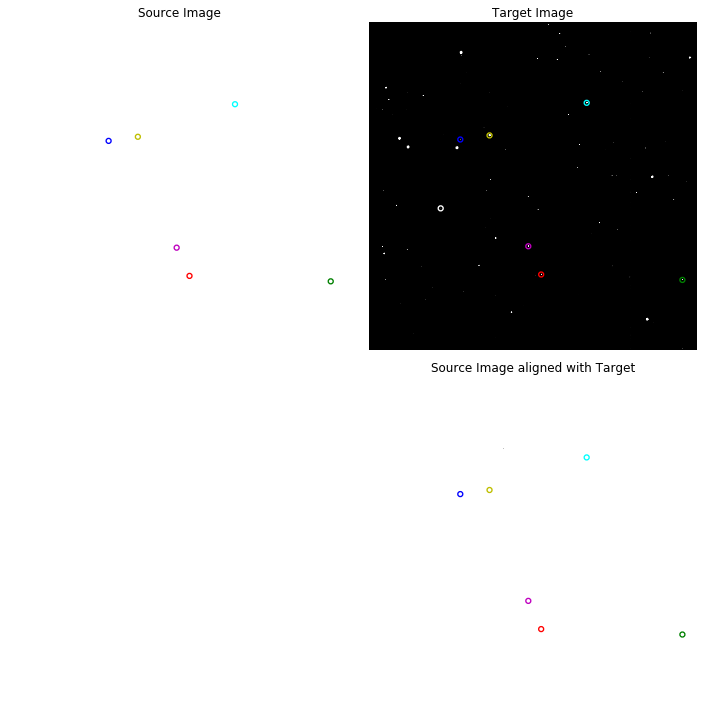

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s051_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-11.03, 11.79)


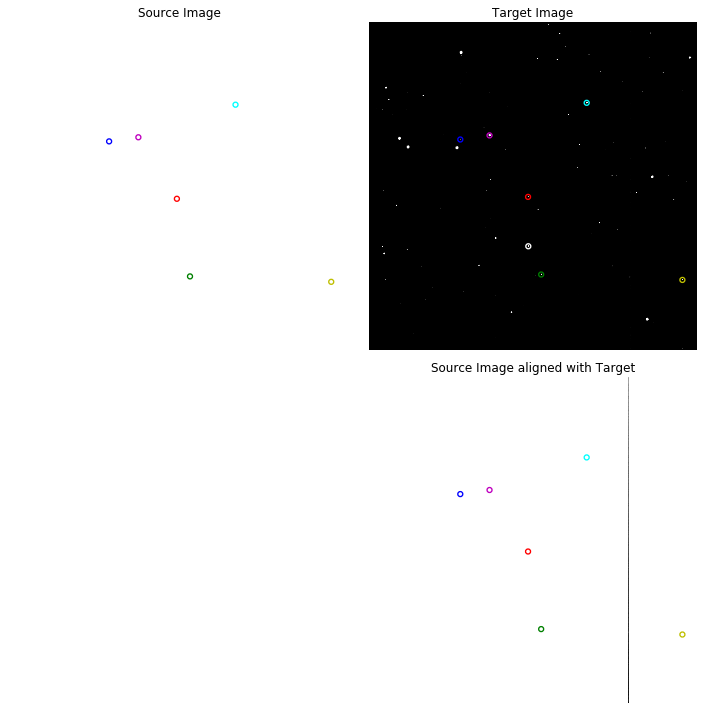

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s052_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-12.95, 14.33)


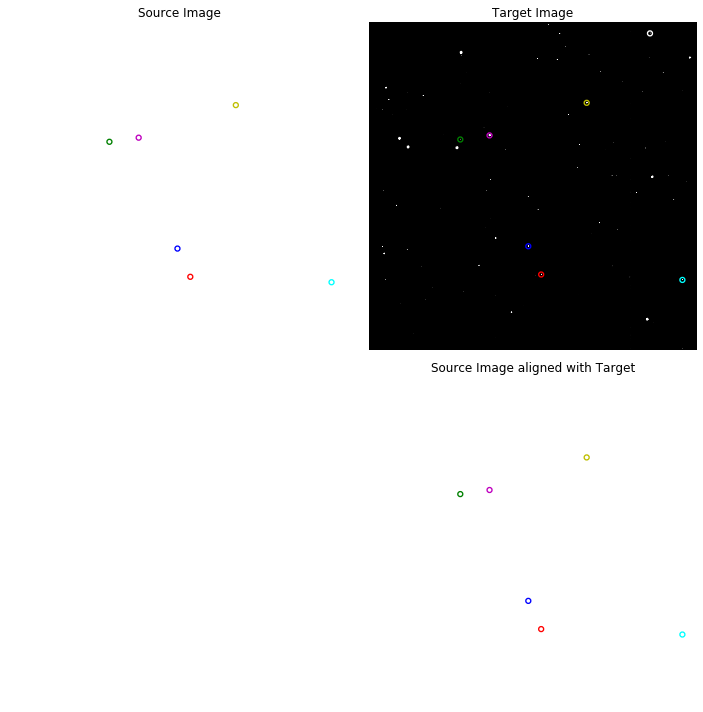

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s054_trf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (0.00, 0.00)


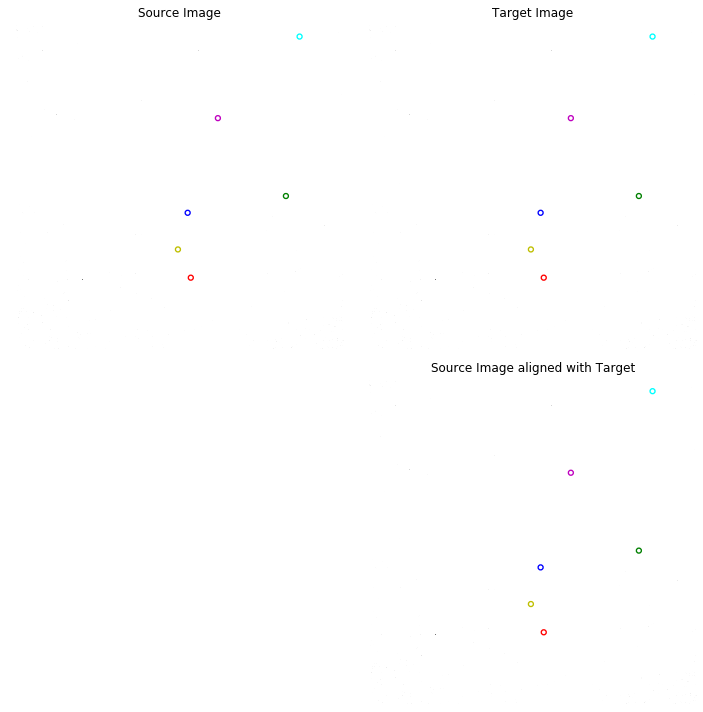

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s055_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (0.00, 0.00)


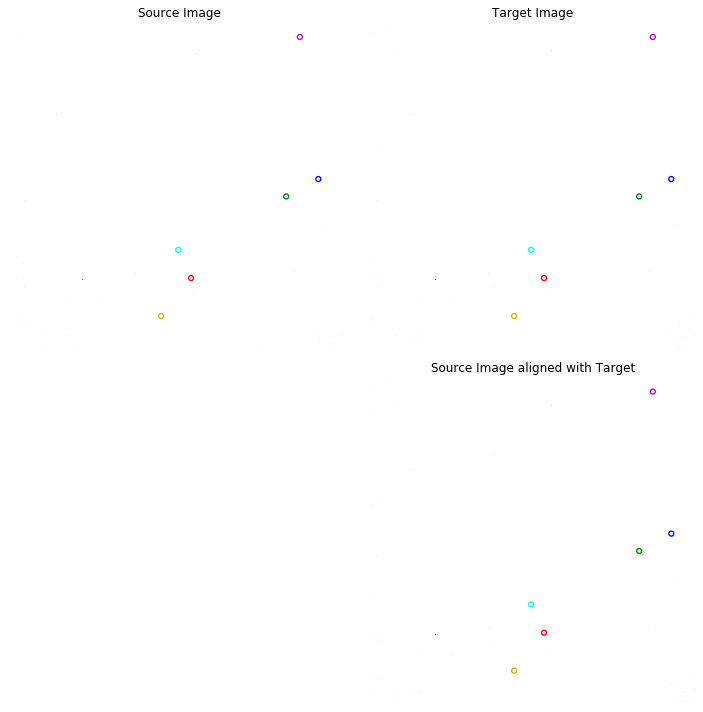

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s057_trf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-2.82, 2.06)


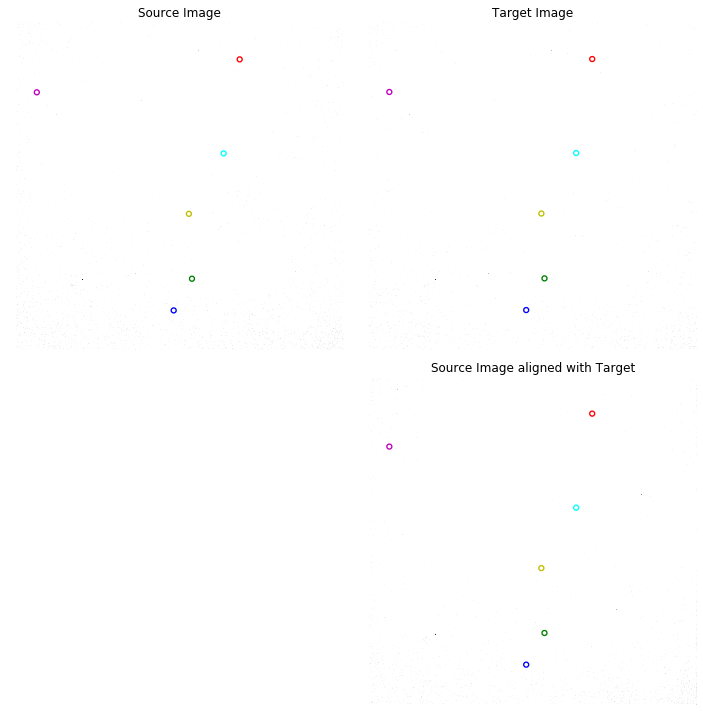

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s058_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-6.28, 4.31)


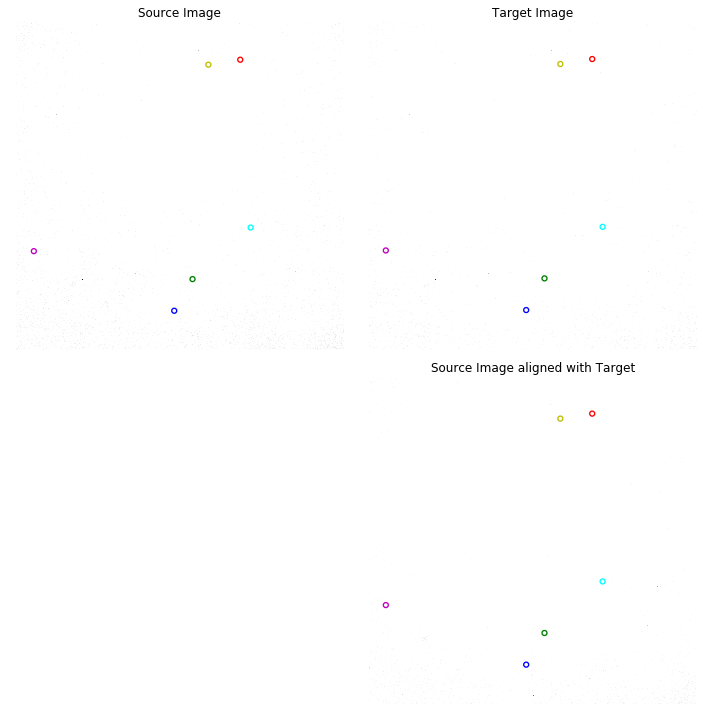

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s065_trf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-31.27, -1.69)


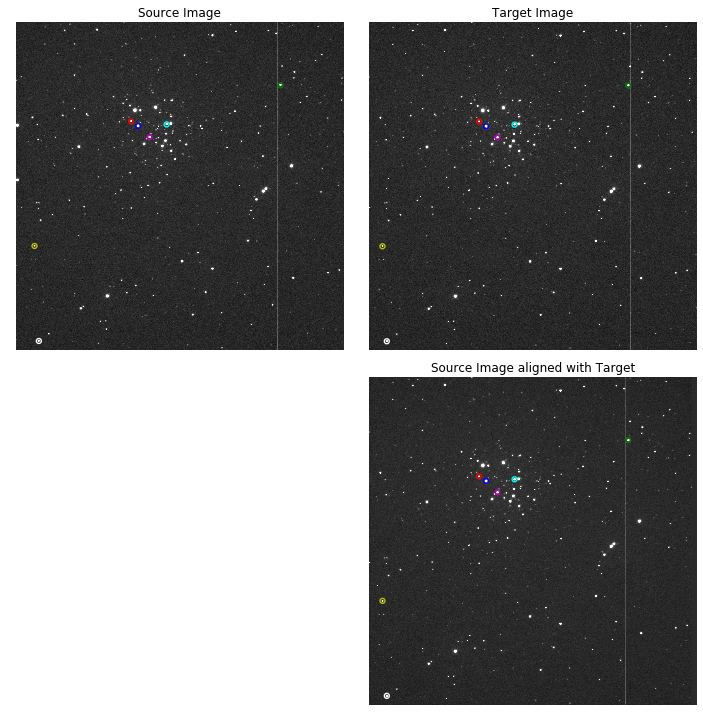

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s066_trf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-66.08, -3.46)


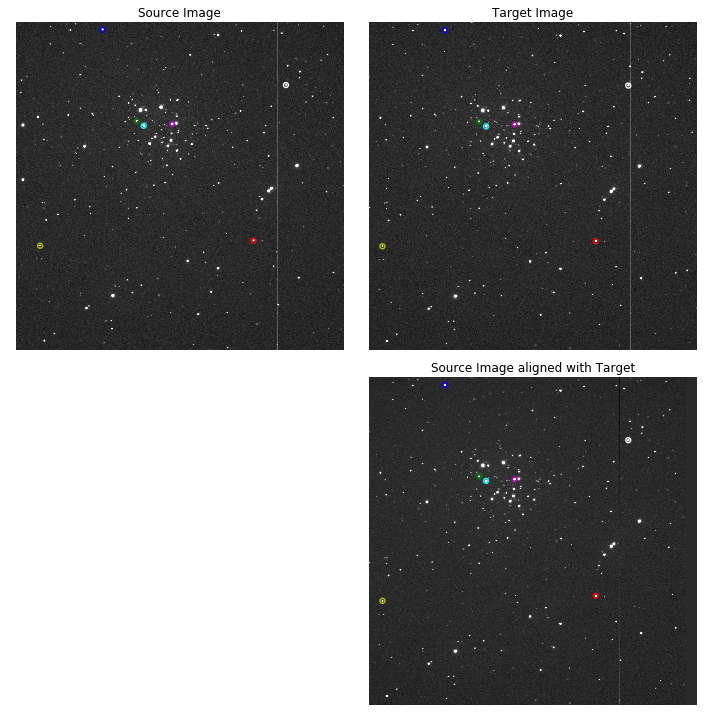

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s067_trf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-101.48, -5.08)


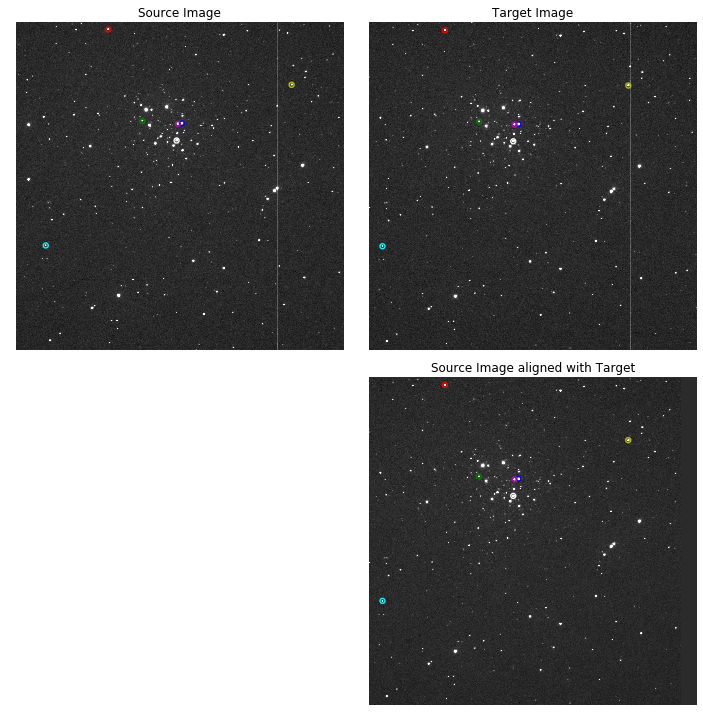

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s068_trf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-133.67, -6.82)


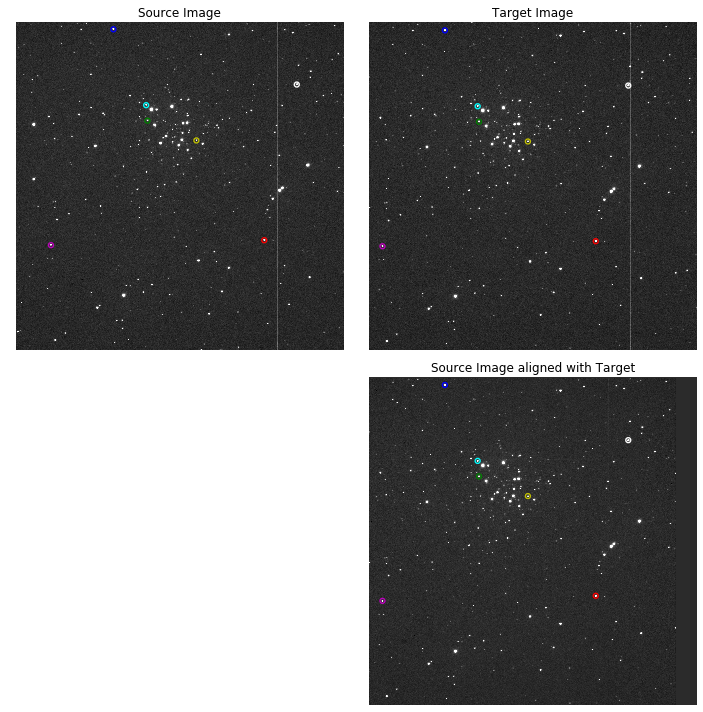

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s069_trf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-165.69, -8.54)


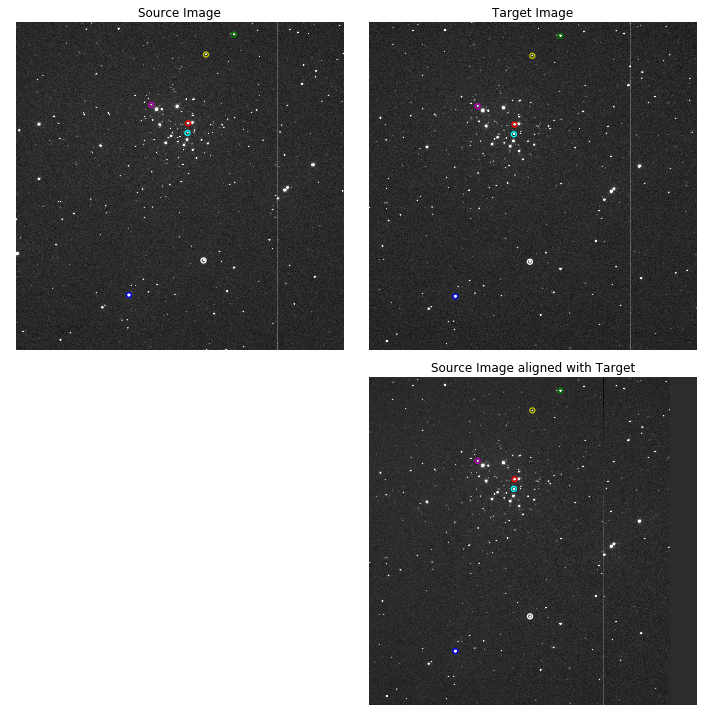

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s070_trf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-199.75, -10.20)


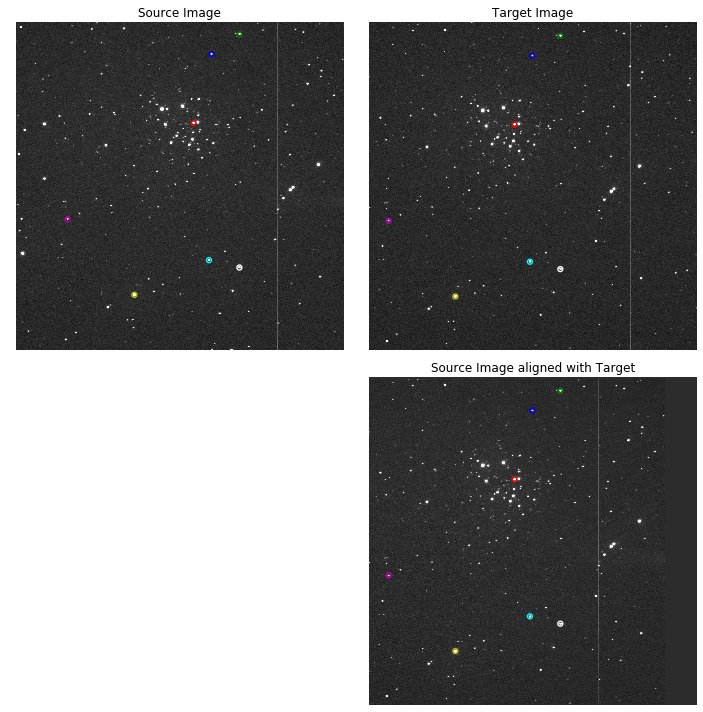

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s071_trf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-232.88, -11.54)


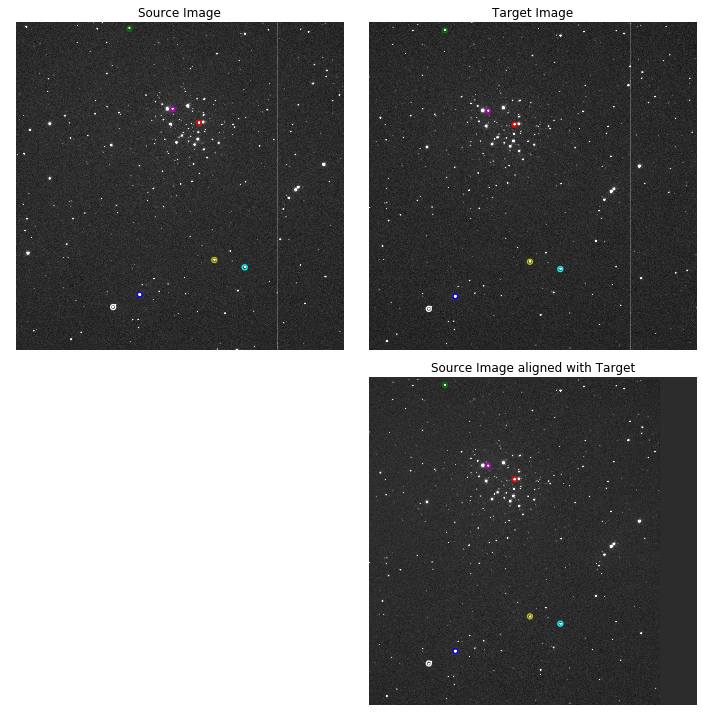

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s072_trf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-262.19, -12.53)


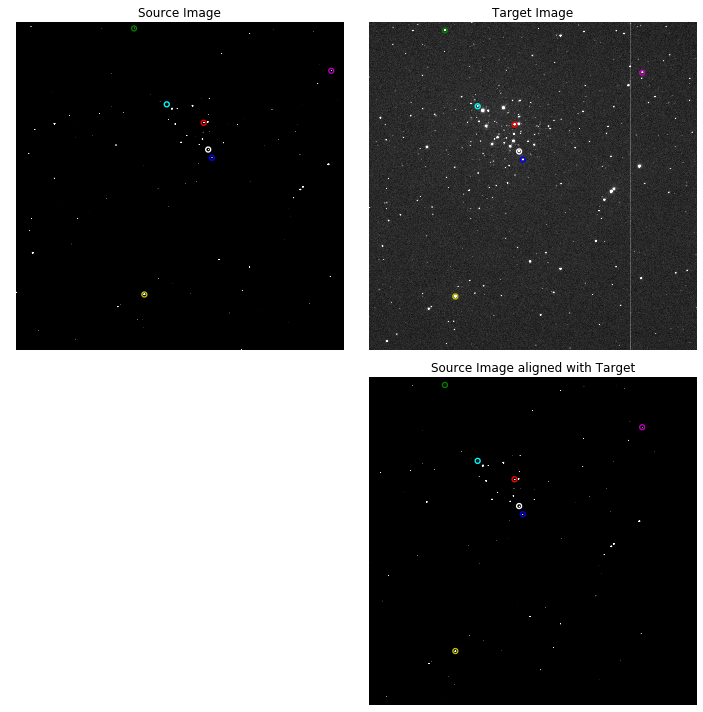

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s073_trf.fits
Rotation: 0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (-294.32, -13.25)


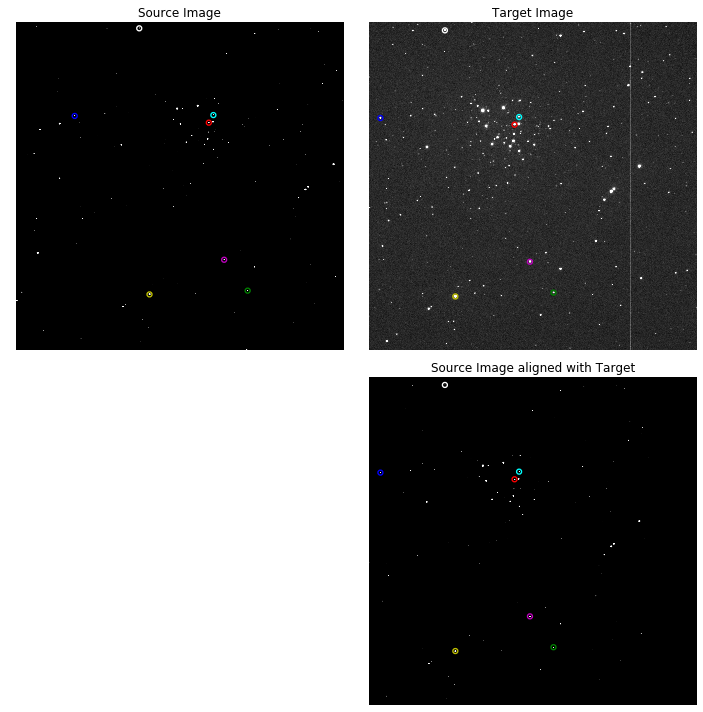

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s074_trf.fits
Rotation: 0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (-325.04, -13.80)


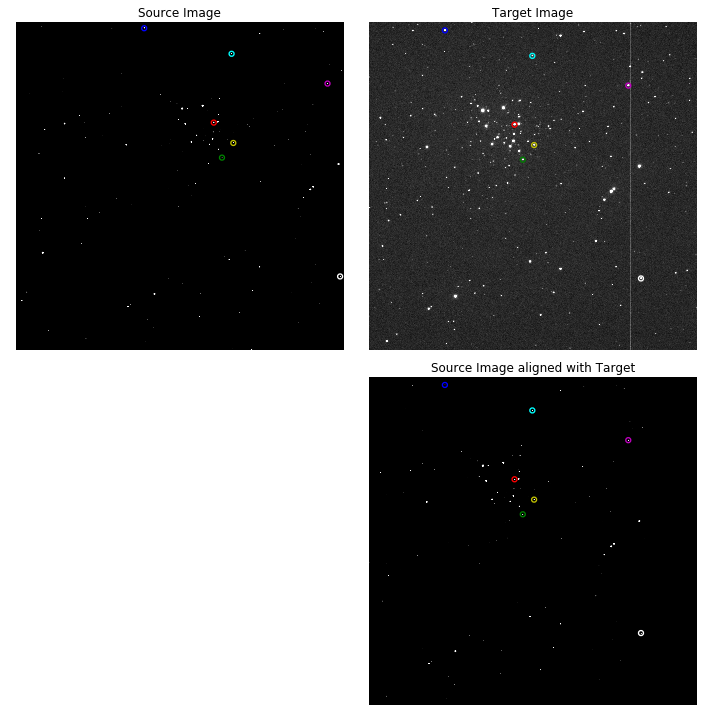

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s079_trf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (31.14, -0.84)


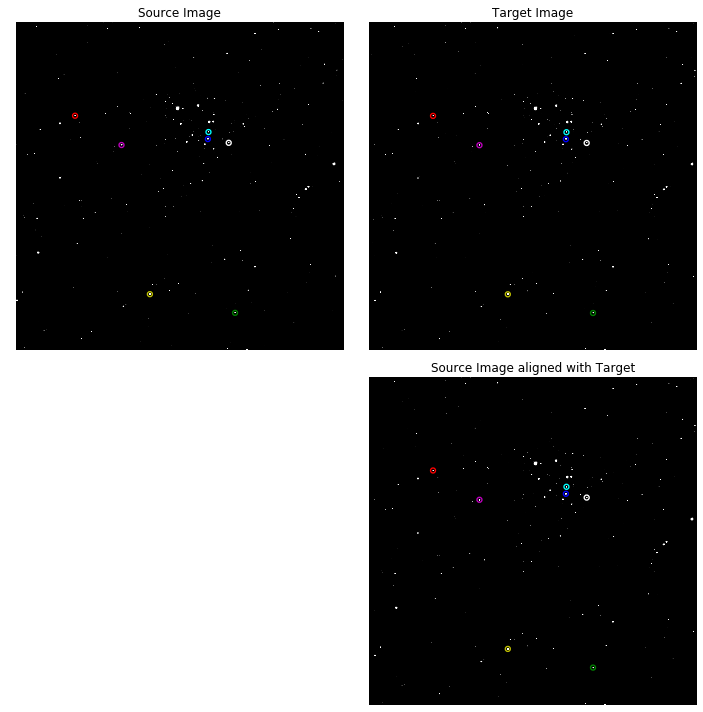

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s080_trf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (62.21, -1.55)


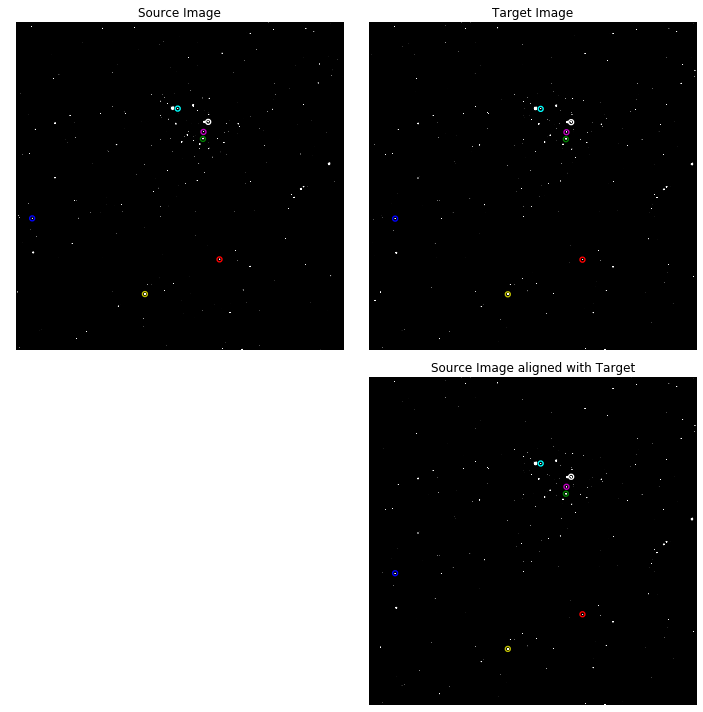

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s081_trf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (92.18, -2.57)


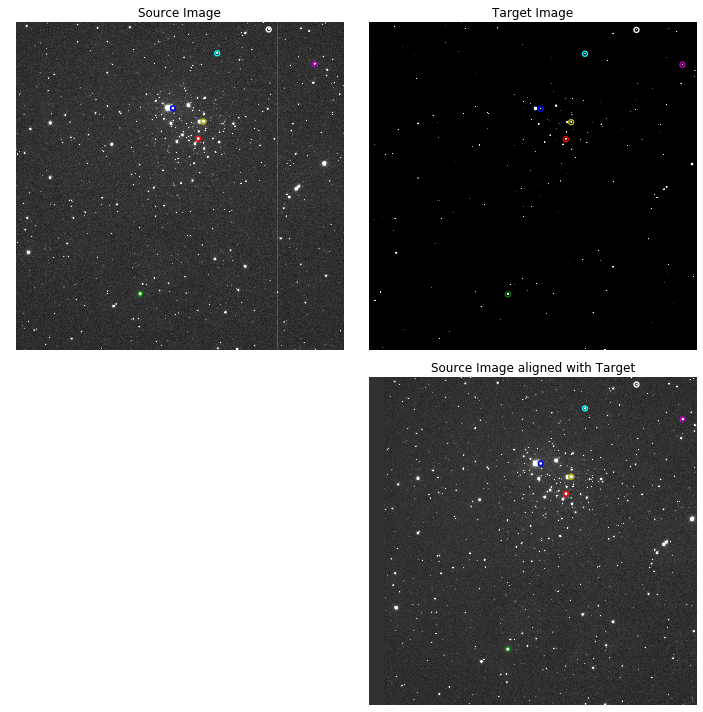

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s082_trf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (120.52, -4.35)


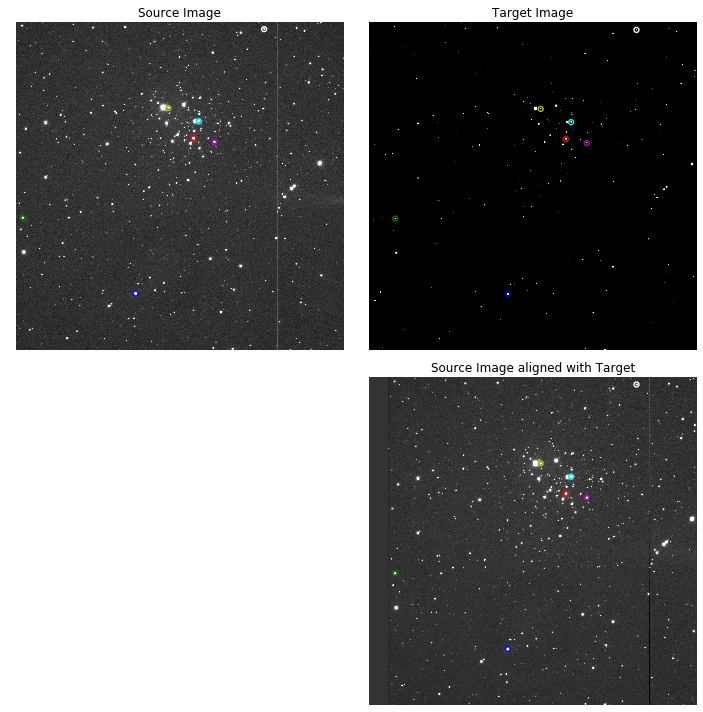

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s083_trf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (150.35, -6.34)


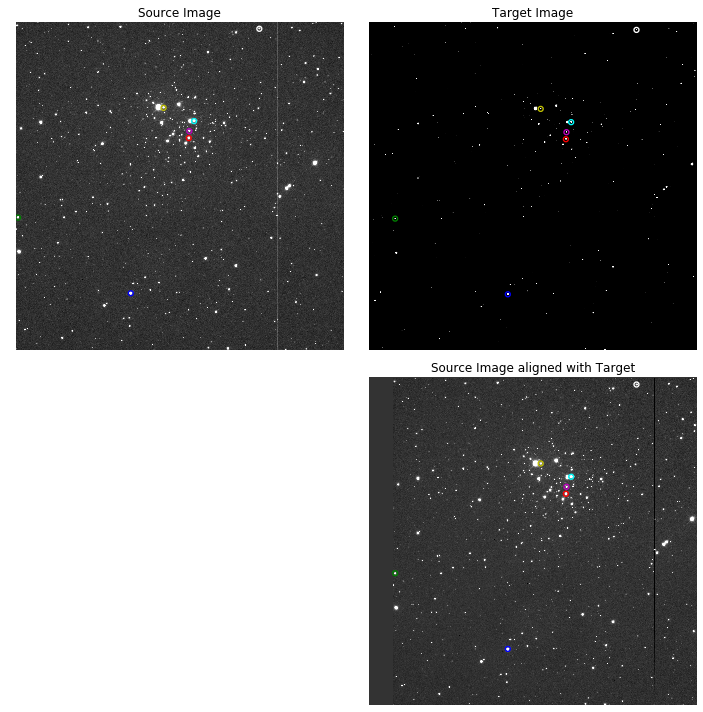

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s084_trf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (179.45, -7.49)


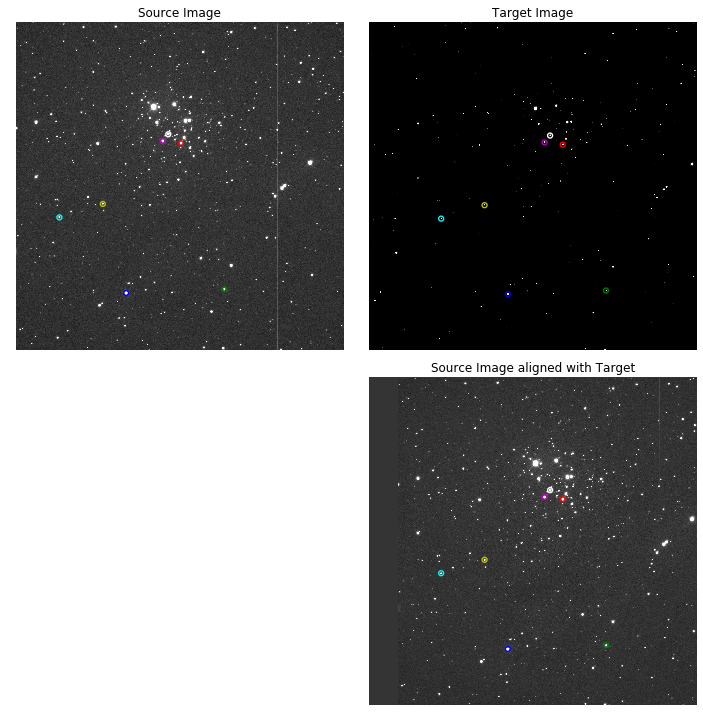

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s085_trf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (210.33, -8.93)


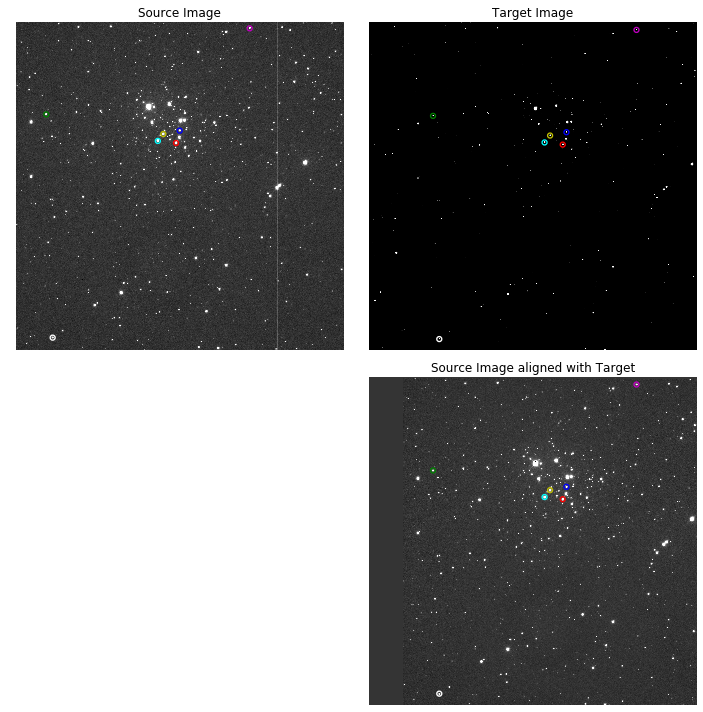

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s086_trf.fits
Rotation: -0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (238.78, -10.44)


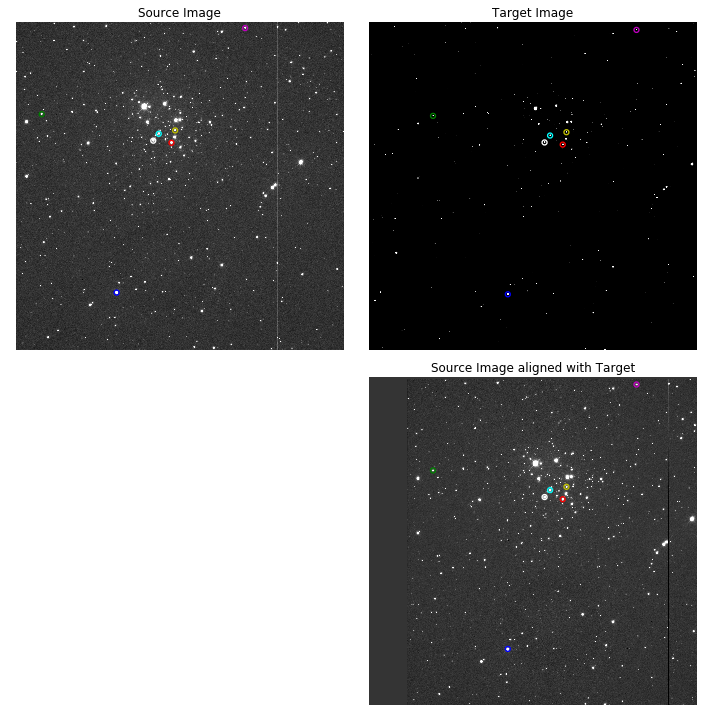

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s087_trf.fits
Rotation: -0.04 degrees

Scale factor: 1.00

Translation: (x, y) = (266.65, -11.70)


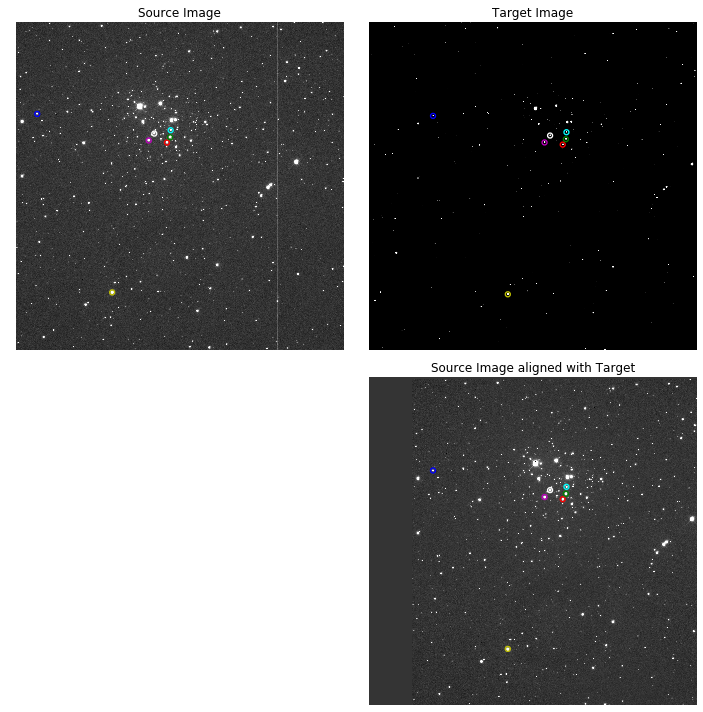

/home/l943z843/RFSLAB//USER_DPT/l943z843/ASTR596/Data/Reduced2/20191106/s088_trf.fits
Rotation: -0.05 degrees

Scale factor: 1.00

Translation: (x, y) = (298.48, -13.60)


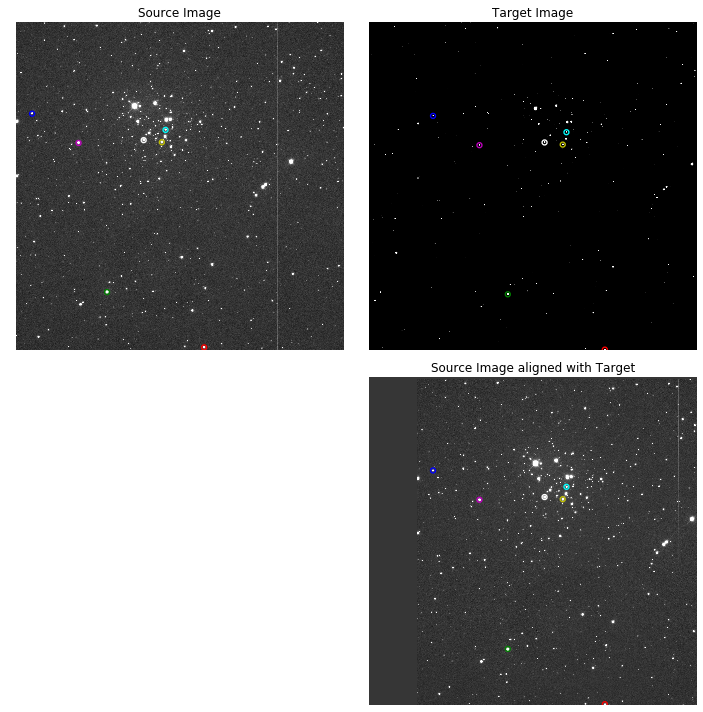

In [26]:
#Nova, R Band
im_trans("s050_trf.fits","s049_trf.fits","s050_trfa.fits")
im_trans("s051_trf.fits","s049_trf.fits","s051_trfa.fits")
im_trans("s052_trf.fits","s049_trf.fits","s052_trfa.fits")
#Nova, V Band
im_trans("s054_trf.fits","s054_trf.fits","s054_trfa.fits")
im_trans("s055_trf.fits","s055_trf.fits","s055_trfa.fits")
#Nova, B Band
im_trans("s057_trf.fits","s056_trf.fits","s057_trfa.fits")
im_trans("s058_trf.fits","s056_trf.fits","s058_trfa.fits")
#NGC 7128, B Band
im_trans("s065_trf.fits","s064_trf.fits","s065_trfa.fits")
im_trans("s066_trf.fits","s064_trf.fits","s066_trfa.fits")
im_trans("s067_trf.fits","s064_trf.fits","s067_trfa.fits")
im_trans("s068_trf.fits","s064_trf.fits","s068_trfa.fits")
im_trans("s069_trf.fits","s064_trf.fits","s069_trfa.fits")
im_trans("s070_trf.fits","s064_trf.fits","s070_trfa.fits")
im_trans("s071_trf.fits","s064_trf.fits","s071_trfa.fits")
im_trans("s072_trf.fits","s064_trf.fits","s072_trfa.fits")
im_trans("s073_trf.fits","s064_trf.fits","s073_trfa.fits")
im_trans("s074_trf.fits","s064_trf.fits","s074_trfa.fits")
#NGC 7128, V Band
im_trans("s079_trf.fits","s078_trf.fits","s079_trfa.fits")
im_trans("s080_trf.fits","s078_trf.fits","s080_trfa.fits")
im_trans("s081_trf.fits","s078_trf.fits","s081_trfa.fits")
im_trans("s082_trf.fits","s078_trf.fits","s082_trfa.fits")
im_trans("s083_trf.fits","s078_trf.fits","s083_trfa.fits")
im_trans("s084_trf.fits","s078_trf.fits","s084_trfa.fits")
im_trans("s085_trf.fits","s078_trf.fits","s085_trfa.fits")
im_trans("s086_trf.fits","s078_trf.fits","s086_trfa.fits")
im_trans("s087_trf.fits","s078_trf.fits","s087_trfa.fits")
im_trans("s088_trf.fits","s078_trf.fits","s088_trfa.fits")

Now open the transformed images in ds9 in different and confirm that they are aligned by blinking the frames.